## Without I-type blocks

In [1]:
!sed -z -i 's/\n#import image_IPP as IPP\n/\nimport image_IPP as IPP\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as IPP\n/\n#import image_IPP_adaptive as IPP as IPP\n/g' RD_curve.py

In [2]:
!grep import RD_curve.py

import distortion
import frame
#import image_interpolated_IPP as IPP
import image_IPP as IPP
#import image_IPP_adaptive as IPP


In [3]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average

BPP: 0.7517615390011223 KBPS: 6858.952 Average AMSE: 49.7563548900463
BPP: 0.7107787948933783 KBPS: 6485.032 Average AMSE: 57.38056487180835
BPP: 0.6732472292368126 KBPS: 6142.6 Average AMSE: 66.60168569374301
BPP: 0.6378805415263749 KBPS: 5819.92 Average AMSE: 77.0008304617354
BPP: 0.6045559764309765 KBPS: 5515.872 Average AMSE: 90.49760101010104
BPP: 0.5750184132996633 KBPS: 5246.376 Average AMSE: 106.05246869739057
BPP: 0.5469118265993266 KBPS: 4989.936 Average AMSE: 124.58244346678589
BPP: 0.5216557940516274 KBPS: 4759.504 Average AMSE: 146.76258253103956
BPP: 0.497978044332211 KBPS: 4543.472 Average AMSE: 172.4633477790053
BPP: 0.47633978675645344 KBPS: 4346.048 Average AMSE: 203.39484493371216
BPP: 0.4573732112794613 KBPS: 4173.0 Average AMSE: 238.66845297593997
BPP: 0.43933869949494947 KBPS: 4008.456 Average AMSE: 280.27864605253933
BPP: 0.42402935606060604 KBPS: 3868.776 Average AMSE: 324.48683054503374
BPP: 0.4111067269921437 KBPS: 3750.872 Average AMSE: 372.00364123000844
BPP

In [4]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 2,7 | tr ' ' '\t'  > /tmp/curve_no_intrablocks.txt

In [5]:
!cat /tmp/curve_no_intrablocks.txt

0.7517615390011223	49.7563548900463
0.7107787948933783	57.38056487180835
0.6732472292368126	66.60168569374301
0.6378805415263749	77.0008304617354
0.6045559764309765	90.49760101010104
0.5750184132996633	106.05246869739057
0.5469118265993266	124.58244346678589
0.5216557940516274	146.76258253103956
0.497978044332211	172.4633477790053
0.47633978675645344	203.39484493371216
0.4573732112794613	238.66845297593997
0.43933869949494947	280.27864605253933
0.42402935606060604	324.48683054503374
0.4111067269921437	372.00364123000844
0.3994703984287318	425.68165180450336
0.38841452721661057	483.44873967539985
0.3797997334455668	537.5542773656705
0.37207403900112235	595.0101701695777
0.36660616582491584	650.7225844600521
0.36113303170594835	716.2003593881524
0.3572679924242424	775.0849406609497


In [6]:
RD_points_no_intrablocks = []
with open("/tmp/curve_no_intrablocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_no_intrablocks.append((float(rate), float(_distortion)))

## With I-type blocks

In [7]:
!sed -z -i 's/\nimport image_IPP as IPP/\n#import image_IPP as IPP/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_adaptive as IPP\n/\nimport image_IPP_adaptive as IPP\n/g' RD_curve.py

In [8]:
!grep import RD_curve.py

import distortion
import frame
#import image_interpolated_IPP as IPP
#import image_IPP as IPP
import image_IPP_adaptive as IPP


In [9]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average

BPP: 0.7287352693602693 KBPS: 6648.864 Average AMSE: 40.84510096625981
BPP: 0.6896394500561167 KBPS: 6292.16 Average AMSE: 47.55179990004209
BPP: 0.6534652076318743 KBPS: 5962.112 Average AMSE: 55.20095058659511
BPP: 0.6206658599887767 KBPS: 5662.856 Average AMSE: 63.92290789842875
BPP: 0.5888511854657688 KBPS: 5372.584 Average AMSE: 74.84315014292228
BPP: 0.5602167508417508 KBPS: 5111.328 Average AMSE: 87.97491944181397
BPP: 0.5345942059483726 KBPS: 4877.552 Average AMSE: 102.39967458876964
BPP: 0.5110558712121213 KBPS: 4662.792 Average AMSE: 120.09376841329964
BPP: 0.49028742283950616 KBPS: 4473.304 Average AMSE: 140.37393992003368
BPP: 0.4703300364758698 KBPS: 4291.216 Average AMSE: 163.74022253787874
BPP: 0.4534643308080808 KBPS: 4137.336 Average AMSE: 190.59326884294333
BPP: 0.43820321268237933 KBPS: 3998.096 Average AMSE: 222.0218300627806
BPP: 0.4251543209876543 KBPS: 3879.04 Average AMSE: 256.2812246817129
BPP: 0.41426416947250283 KBPS: 3779.68 Average AMSE: 296.4588974598415
B

In [10]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 2,7 | tr ' ' '\t'  > /tmp/curve_with_intrablocks.txt

In [11]:
!cat /tmp/curve_with_intrablocks.txt

0.7287352693602693	40.84510096625981
0.6896394500561167	47.55179990004209
0.6534652076318743	55.20095058659511
0.6206658599887767	63.92290789842875
0.5888511854657688	74.84315014292228
0.5602167508417508	87.97491944181397
0.5345942059483726	102.39967458876964
0.5110558712121213	120.09376841329964
0.49028742283950616	140.37393992003368
0.4703300364758698	163.74022253787874
0.4534643308080808	190.59326884294333
0.43820321268237933	222.0218300627806
0.4251543209876543	256.2812246817129
0.41426416947250283	296.4588974598415
0.40429117564534234	337.092570123983
0.39426995650953983	382.0921660178171
0.38601729096520765	428.2882572469486
0.37947881593714927	474.13923424786054
0.3738329475308642	526.9521364907757
0.3692936307519641	577.1087740468924
0.3650173611111111	639.831924825512


In [12]:
RD_points_with_intrablocks = []
with open("/tmp/curve_with_intrablocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_with_intrablocks.append((float(rate), float(_distortion)))

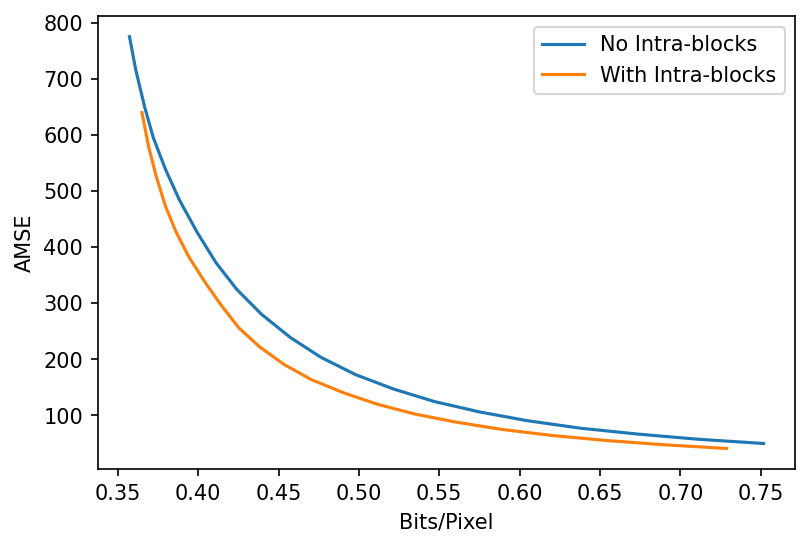

In [13]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points_with_intrablocks), label="With Intra-blocks")
pylab.title("")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()